# **Data Preparation**

We have downloaded all the pictures from the dataset into a folder.

In [378]:
# import pandas as pd
# import os
# import urllib.request
# from urllib.parse import quote

# dataset_path = 'Dataset\ML Dataset - ECT report 66.xlsx'
# df1 = pd.read_excel(dataset_path, sheet_name = 'Candidate_Constituency')
# df2 = pd.read_excel(dataset_path, sheet_name = 'Candidate_PartyList')
# df3 = pd.read_excel(dataset_path, sheet_name = 'Candidate_PM')

# URL_list = []

# # Get the URLs from the dataset
# for i in range(len(df1)):
#     URL_list.append(df1['image_url'][i])
# for i in range(len(df2)):
#     URL_list.append(df2['image_url'][i])
# for i in range(len(df3)):
#     URL_list.append(df3['image_url'][i])

# # Eliminate the duplicate URLs
# URL_list = list(set(URL_list))

# # Download the pictures
# # For each of the URLs, get the file name and check if the file already exists, if not, download the picture to 'HW2\pics\'
# for i in range(len(URL_list)):
#     file_name = URL_list[i].split('/')[-1]
#     if not os.path.exists('HW2\\pics\\' + file_name):
#         urllib.request.urlretrieve('https://ectreport66.ect.go.th/images/mp_candidates/' + quote(file_name), 'HW2\\pics\\' + file_name)
#         print('Downloaded ' + file_name)
#     else:
#         print(file_name + ' already exists')

Afterward, we remove files that are not images, such as error pages.

In [379]:
# import os

# def is_imposter_html(file_path):
#     try:
#         with open(file_path, 'r', encoding='utf-8') as file:
#             content = file.read()
#             return "<!DOCTYPE html>" in content
#     except (UnicodeDecodeError, FileNotFoundError):
#         return False

# def remove_imposter_images(folder_path):
#     for root, dirs, files in os.walk(folder_path):
#         for file in files:
#             file_path = os.path.join(root, file)
#             if is_imposter_html(file_path):
#                 os.remove(file_path)
#                 print('Removed imposter image: ' + file_path)

# if __name__ == '__main__':
#     folder_path = 'HW2/pics'  # Update with your folder path
#     remove_imposter_images(folder_path)

Subsequently, we utilize the `face_recognition` library to convert each image into a 128-dimension vector representing the face in the image, saving it into a file.

In [380]:
# import face_recognition
# import os
# import csv
# import multiprocessing

# folder_path = 'HW2/pics'
# csv_filename = 'HW2/face_encoding.csv'

# def process_image(file):
#     file_path = os.path.join(folder_path, file)
#     image = face_recognition.load_image_file(file_path)
#     encoding = face_recognition.face_encodings(image)

#     if len(encoding) == 0:
#         print(f"No face detected in {file}")
#         return None

#     gender = 0
#     if "นาง" in file or "หญิง" in file:
#         gender = 1

#     encoding_data = [file.encode('utf-8').decode('utf-8')]
#     for e in encoding[0]:
#         encoding_data.append(e)
#     encoding_data.append(gender)

#     return encoding_data

# if __name__ == '__main__':
#     folder_path = 'HW2/pics'
#     csv_filename = 'HW2/face_encoding.csv'

#     data = []

#     header = ["name"]
#     for i in range(128):
#         header.append(f"e{i}")
#     header.append("gender")

#     data.append(header)

#     files = os.listdir(folder_path)
#     # files = files[0:20]

#     # Set the number of processes (adjust to your system's capabilities)
#     num_processes = 16

#     with multiprocessing.Pool(processes=num_processes) as pool:
#         result = pool.map(process_image, files)

#     for encoding_data in result:
#         if encoding_data is not None:
#             data.append(encoding_data)

#     with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
#         csv_writer = csv.writer(csv_file)
#         csv_writer.writerows(data)

# **Reading the data into python and data description**

In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [382]:
import warnings
warnings.filterwarnings('ignore')

In [383]:
df = pd.read_excel("face_encoding.xlsx", sheet_name = "face_encoding")
before = df.shape
df = df.drop_duplicates()
after = df.shape
if after == before:
    print("There is no dulicate values and shape is", after)
else:
    print("Shape after deleting duplicate values", after)
df.head()

There is no dulicate values and shape is (4198, 130)


gender        e0        e1        e2        e3        e4        e5  \
0       0 -0.147930  0.157236  0.028492  0.044232 -0.119152  0.052413   
1       0 -0.033839  0.065407  0.000558  0.068055 -0.055688 -0.067214   
2       0 -0.069820  0.054235  0.067975 -0.055684 -0.034180 -0.112037   
3       0  0.022184  0.063455 -0.067152 -0.055712 -0.070551 -0.028909   
4       0 -0.114533  0.092068 -0.037939 -0.065106 -0.052364 -0.071705   

         e6        e7        e8  ...      e119      e120      e121      e122  \
0 -0.023316 -0.189706  0.128055  ...  0.031200  0.030047  0.003619 -0.163715   
1  0.000100 -0.139812  0.151631  ...  0.041300 -0.030517 -0.011613 -0.127544   
2 -0.050120 -0.090974  0.105163  ...  0.047398 -0.007842 -0.084264 -0.081022   
3  0.051755 -0.157738  0.119448  ...  0.010850 -0.020403 -0.034692 -0.117198   
4 -0.074878 -0.180341  0.153823  ... -0.006797  0.020938 -0.003236 -0.206251   

       e123      e124      e125      e126      e127  \
0 -0.061043  0.066998 -0.027978  0.054791 -0.023477   
1 -0.118607  0.056703 -0.017975  0.010267 -0.034093   
2 -0.149271  0.082800  0.068550  0.063962  0.015021   
3 -0.065476  0.011952  0.078020 -0.032138 -0.023086   
4 -0.063348  0.172399 -0.001473  0.090032 -0.001793   

                                                name  
0  เธเนเธฒเธชเธดเธเธ•เธณเธฃเธงเธเธเธดเธฃเธฐเ...  
1  เธเนเธฒเธชเธดเธเน€เธญเธเธเธนเธ“เธ‘เน_เธ...  
2  เธเนเธฒเธชเธดเธเน€เธญเธเธ—เธฑเธ”เน€เธ—เธตเ...  
3  เธเนเธฒเธญเธฒเธเธฒเธจเธ•เธฃเธตเธงเธดเธฃเธดเ...  
4  เธเนเธฒเธญเธฒเธเธฒเธจเน€เธญเธเธเธฃเธฐเธเ...  

[5 rows x 130 columns]

# **Defining the problem statement**

The objective is to analyze this data to learn and predict whether images of the Candidate's Constituency can be used to determine gender.

Create a predictive model that can determine the gender of a candidate based on images of their constituency.

* **Target :** gender
* **Attributes :** e0, e1, e2, ..., e127

  * gender = 1 means female.
  * gender = 0 means male.

# **Looking at the distribution of Target**

**Keys :**
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.
* If there is too much skewness, then outlier treatment should be done

<Axes: xlabel='gender'>

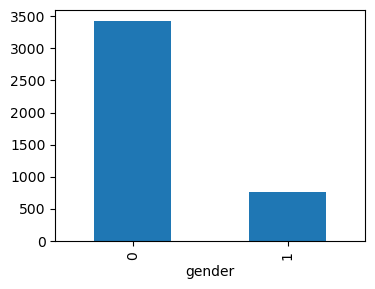

In [384]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData = df.groupby('gender').size()
GroupedData.plot(kind = 'bar', figsize = (4,3))

The distribution of the target variable is imbalanced, although there are sufficient rows for both `gender = 0` and `gender = 1` for the machine learning algorithms to learn. However, there is a slight imbalance, with `gender = 1` being slightly fewer than `gender = 0`. Consequently, the model might predict `gender = 1` less accurately compared to `gender = 0`.

# **Basic data exploration**

**Keys :**

This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are **Quantitative, Categorical or Qualitative**.

This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? 

There are four commands which are used for Basic data exploration in Python

* head() : This helps to see a few sample rows of the data
* info() : This provides the summarized information of the data
* describe() : This provides the descriptive statistical details of the data
* nunique(): This helps us to identify if a column is categorical or continuous

In [385]:
df.head()

gender        e0        e1        e2        e3        e4        e5  \
0       0 -0.147930  0.157236  0.028492  0.044232 -0.119152  0.052413   
1       0 -0.033839  0.065407  0.000558  0.068055 -0.055688 -0.067214   
2       0 -0.069820  0.054235  0.067975 -0.055684 -0.034180 -0.112037   
3       0  0.022184  0.063455 -0.067152 -0.055712 -0.070551 -0.028909   
4       0 -0.114533  0.092068 -0.037939 -0.065106 -0.052364 -0.071705   

         e6        e7        e8  ...      e119      e120      e121      e122  \
0 -0.023316 -0.189706  0.128055  ...  0.031200  0.030047  0.003619 -0.163715   
1  0.000100 -0.139812  0.151631  ...  0.041300 -0.030517 -0.011613 -0.127544   
2 -0.050120 -0.090974  0.105163  ...  0.047398 -0.007842 -0.084264 -0.081022   
3  0.051755 -0.157738  0.119448  ...  0.010850 -0.020403 -0.034692 -0.117198   
4 -0.074878 -0.180341  0.153823  ... -0.006797  0.020938 -0.003236 -0.206251   

       e123      e124      e125      e126      e127  \
0 -0.061043  0.066998 -0.027978  0.054791 -0.023477   
1 -0.118607  0.056703 -0.017975  0.010267 -0.034093   
2 -0.149271  0.082800  0.068550  0.063962  0.015021   
3 -0.065476  0.011952  0.078020 -0.032138 -0.023086   
4 -0.063348  0.172399 -0.001473  0.090032 -0.001793   

                                                name  
0  เธเนเธฒเธชเธดเธเธ•เธณเธฃเธงเธเธเธดเธฃเธฐเ...  
1  เธเนเธฒเธชเธดเธเน€เธญเธเธเธนเธ“เธ‘เน_เธ...  
2  เธเนเธฒเธชเธดเธเน€เธญเธเธ—เธฑเธ”เน€เธ—เธตเ...  
3  เธเนเธฒเธญเธฒเธเธฒเธจเธ•เธฃเธตเธงเธดเธฃเธดเ...  
4  เธเนเธฒเธญเธฒเธเธฒเธจเน€เธญเธเธเธฃเธฐเธเ...  

[5 rows x 130 columns]

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4198 entries, 0 to 4197
Columns: 130 entries, gender to name
dtypes: float64(128), int64(1), object(1)
memory usage: 4.2+ MB


In [387]:
df.describe(include = 'all')

gender           e0           e1           e2           e3  \
count   4198.000000  4198.000000  4198.000000  4198.000000  4198.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.183182    -0.095023     0.085975     0.045281    -0.023218   
std        0.386862     0.044778     0.044553     0.037847     0.039494   
min        0.000000    -0.250093    -0.076683    -0.083207    -0.175799   
25%        0.000000    -0.125326     0.055143     0.020197    -0.050231   
50%        0.000000    -0.095167     0.084995     0.045368    -0.021281   
75%        0.000000    -0.064107     0.115148     0.070235     0.004223   
max        1.000000     0.061225     0.249077     0.199990     0.100446   

                 e4           e5           e6           e7           e8  ...  \
count   4198.000000  4198.000000  4198.000000  4198.000000  4198.000000  ...   
unique          NaN          NaN          NaN          NaN          NaN  ...   
top             NaN          NaN          NaN          NaN          NaN  ...   
freq            NaN          NaN          NaN          NaN          NaN  ...   
mean      -0.060130    -0.033486    -0.049525    -0.154308     0.134315  ...   
std        0.039562     0.041496     0.041022     0.038357     0.037677  ...   
min       -0.203738    -0.171465    -0.174812    -0.268488    -0.002677  ...   
25%       -0.086902    -0.060899    -0.077573    -0.180843     0.108208  ...   
50%       -0.059277    -0.033462    -0.050375    -0.155084     0.132984  ...   
75%       -0.032435    -0.005607    -0.022274    -0.129454     0.159146  ...   
max        0.086251     0.128548     0.108144     0.012105     0.295467  ...   

               e119         e120         e121         e122         e123  \
count   4198.000000  4198.000000  4198.000000  4198.000000  4198.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.057206     0.006072    -0.003535    -0.185052    -0.060659   
std        0.040552     0.034069     0.043573     0.041739     0.038079   
min       -0.073959    -0.129040    -0.171951    -0.320121    -0.196087   
25%        0.029641    -0.017361    -0.032173    -0.213571    -0.086659   
50%        0.058424     0.005439    -0.001948    -0.186561    -0.060145   
75%        0.085569     0.028692     0.025154    -0.158298    -0.033893   
max        0.205942     0.134865     0.147099    -0.007372     0.051829   

               e124         e125         e126         e127  \
count   4198.000000  4198.000000  4198.000000  4198.000000   
unique          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN   
mean       0.084460    -0.013244     0.041828    -0.002537   
std        0.046843     0.042461     0.042381     0.035255   
min       -0.100871    -0.175044    -0.109887    -0.105694   
25%        0.052808    -0.041760     0.013389    -0.026292   
50%        0.085646    -0.012640     0.042983    -0.003945   
75%        0.117526     0.015580     0.070549     0.020302   
max        0.231026     0.132639     0.176105     0.126927   

                                                     name  
count                                                4198  
unique                                               4198  
top     เธเนเธฒเธชเธดเธเธ•เธณเธฃเธงเธเธเธดเธฃเธฐเ...  
freq                                                    1  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                      

In [388]:
df.nunique()

gender       2
e0        4197
e1        4197
e2        4197
e3        4197
          ... 
e124      4197
e125      4197
e126      4197
e127      4197
name      4198
Length: 130, dtype: int64

**Data Exploration Results**

The selected columns in this step are not final, further study will be done and then a final list will be created

* `gender` : Continuous(numeric). Selected. This is the Target Variable!
* `e0 - e127` : Continuous(numeric). Selected.
* `name` : Categorical(norminal). **Rejected!** This column does not affect the gender.

**Summary :** In this data `"name"` is a columns which is useless to us because it does not affect the male or female. Hence, we will remove `"name"` from the data.

In [389]:
df = df.drop("name", axis = 1)
attributes = df.drop("gender", axis = 1)
target = df['gender']

# **Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts) and feature selection based on data distribution**

**Keys :**
* Continuous variables : Histogram and Boxplot

**Visualize distribution of all the Continuous Predictor variables in the data using histograms**

Based on the Basic Data Exploration, 128 continuous predictor variables were found `"e0", "e1", "e2", ..., "e127"`

array([[<Axes: title={'center': 'e0'}>, <Axes: title={'center': 'e1'}>,
        <Axes: title={'center': 'e2'}>, <Axes: title={'center': 'e3'}>,
        <Axes: title={'center': 'e4'}>, <Axes: title={'center': 'e5'}>,
        <Axes: title={'center': 'e6'}>, <Axes: title={'center': 'e7'}>,
        <Axes: title={'center': 'e8'}>, <Axes: title={'center': 'e9'}>,
        <Axes: title={'center': 'e10'}>],
       [<Axes: title={'center': 'e11'}>, <Axes: title={'center': 'e12'}>,
        <Axes: title={'center': 'e13'}>, <Axes: title={'center': 'e14'}>,
        <Axes: title={'center': 'e15'}>, <Axes: title={'center': 'e16'}>,
        <Axes: title={'center': 'e17'}>, <Axes: title={'center': 'e18'}>,
        <Axes: title={'center': 'e19'}>, <Axes: title={'center': 'e20'}>,
        <Axes: title={'center': 'e21'}>],
       [<Axes: title={'center': 'e22'}>, <Axes: title={'center': 'e23'}>,
        <Axes: title={'center': 'e24'}>, <Axes: title={'center': 'e25'}>,
        <Axes: title={'center': 'e26'}

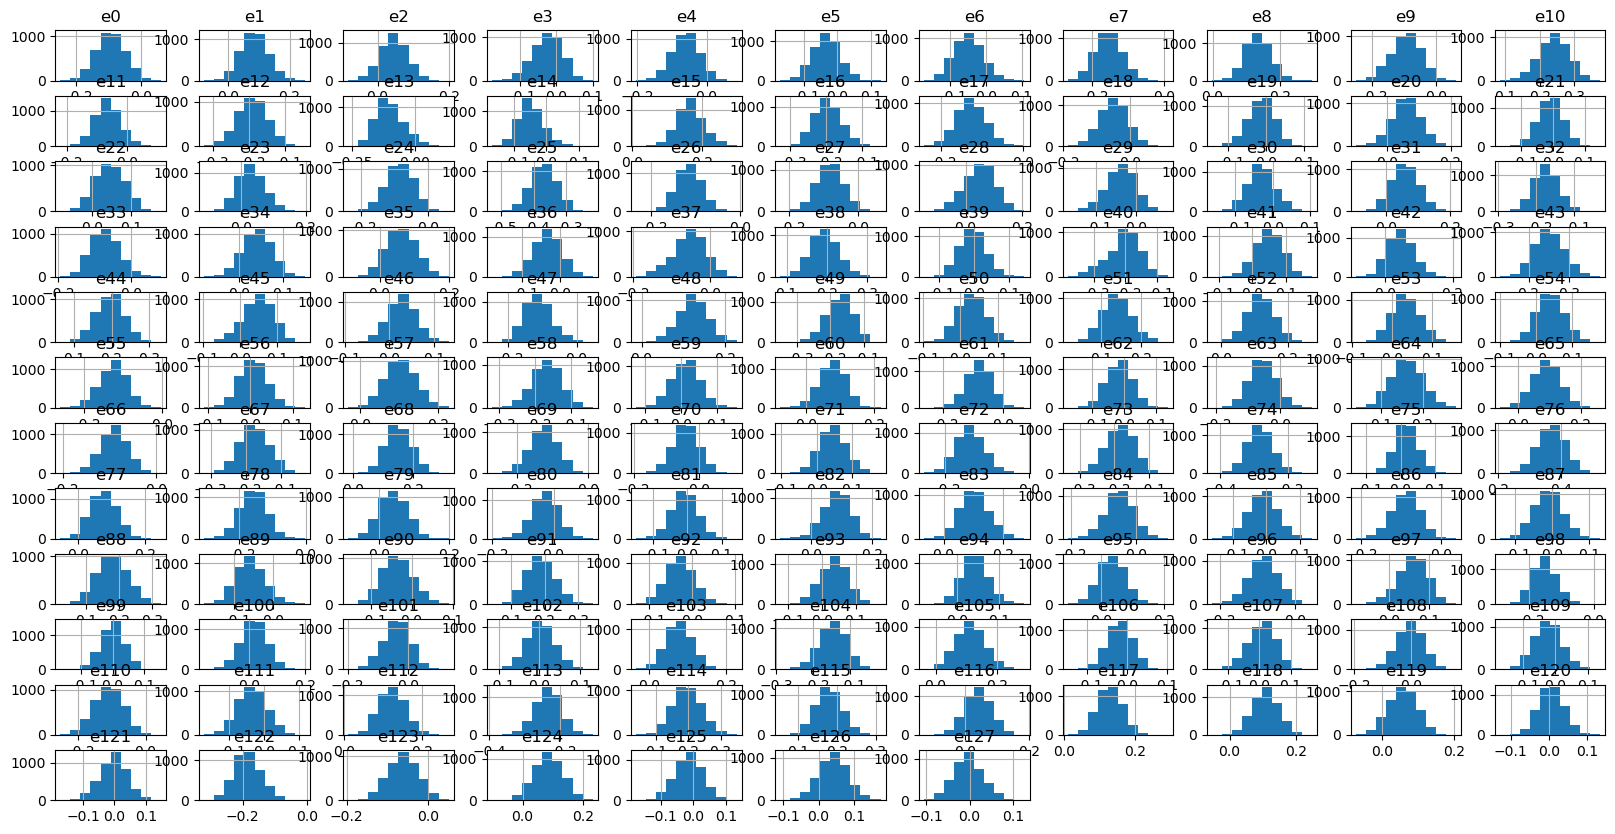

In [390]:
df.hist(['e0', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 
         'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 
         'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25', 'e26', 'e27', 
         'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35', 'e36', 
         'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45', 
         'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'e53', 'e54', 
         'e55', 'e56', 'e57', 'e58', 'e59', 'e60', 'e61', 'e62', 'e63', 
         'e64', 'e65', 'e66', 'e67', 'e68', 'e69', 'e70', 'e71', 'e72', 
         'e73', 'e74', 'e75', 'e76', 'e77', 'e78', 'e79', 'e80', 'e81', 
         'e82', 'e83', 'e84', 'e85', 'e86', 'e87', 'e88', 'e89', 'e90', 
         'e91', 'e92', 'e93', 'e94', 'e95', 'e96', 'e97', 'e98', 'e99', 
         'e100', 'e101', 'e102', 'e103', 'e104', 'e105', 'e106', 'e107', 
         'e108', 'e109', 'e110', 'e111', 'e112', 'e113', 'e114', 'e115', 
         'e116', 'e117', 'e118', 'e119', 'e120', 'e121', 'e122', 'e123', 
         'e124', 'e125', 'e126', 'e127'], figsize = (20,10))

<Axes: >

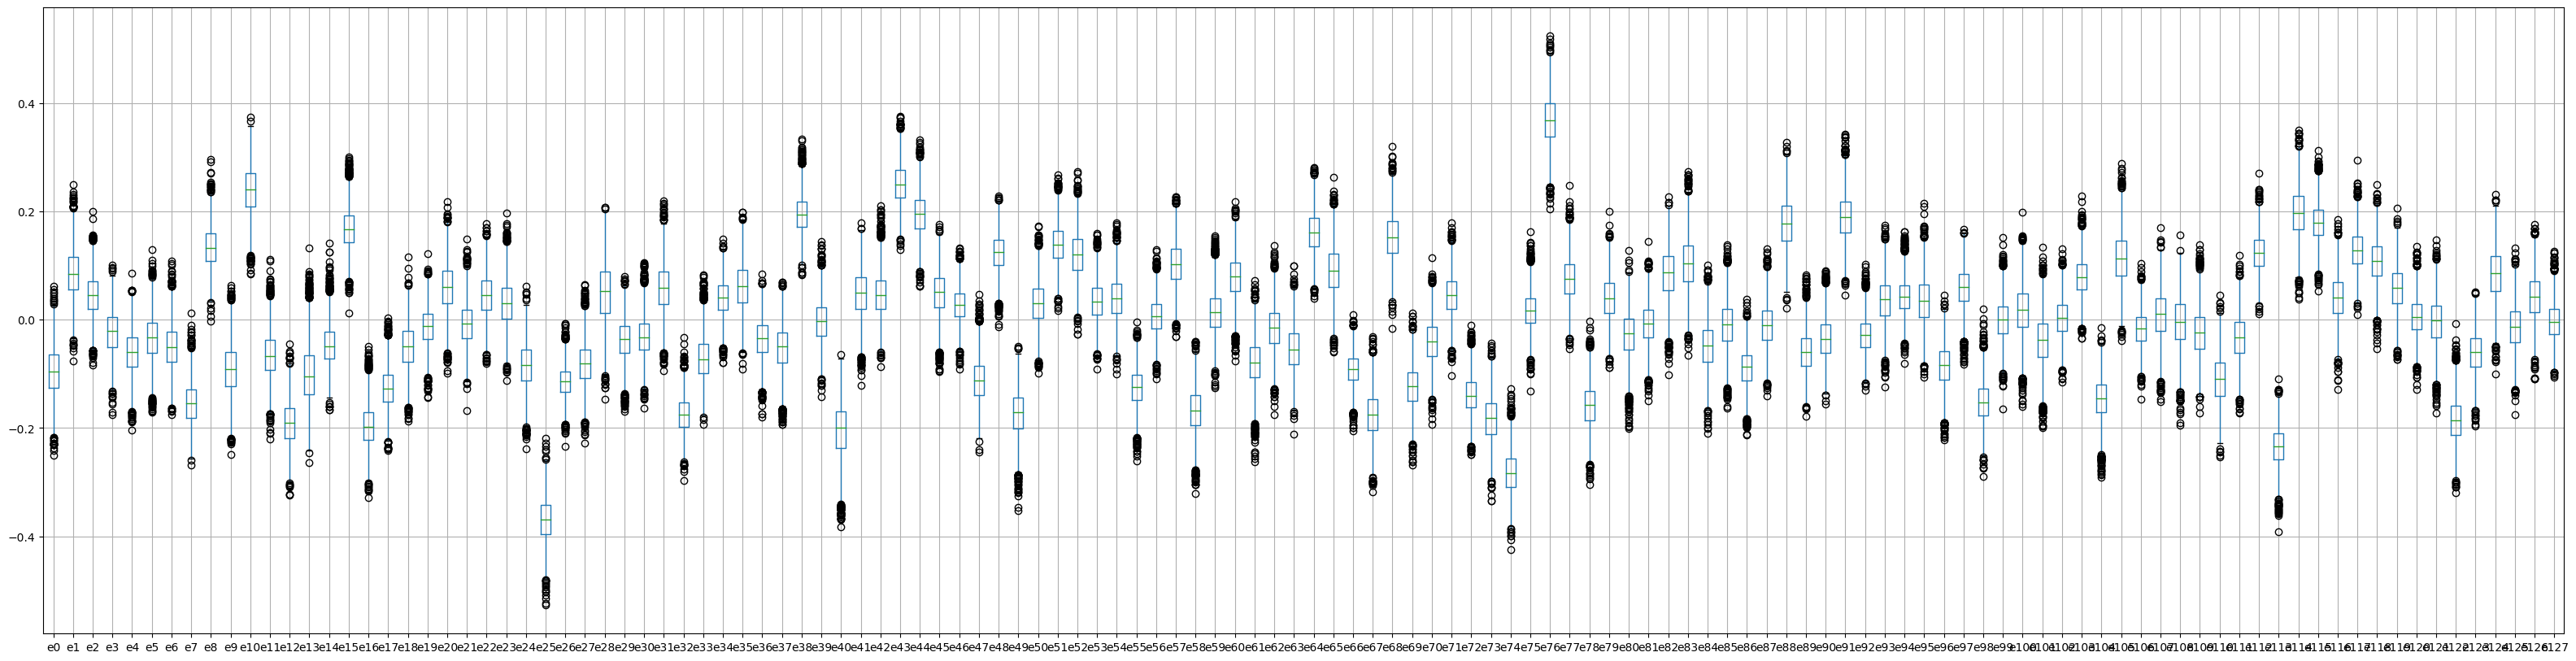

In [391]:
df.boxplot(['e0', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 
            'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 
            'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25', 'e26', 'e27', 
            'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35', 'e36', 
            'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45', 
            'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'e53', 'e54', 
            'e55', 'e56', 'e57', 'e58', 'e59', 'e60', 'e61', 'e62', 'e63', 
            'e64', 'e65', 'e66', 'e67', 'e68', 'e69', 'e70', 'e71', 'e72', 
            'e73', 'e74', 'e75', 'e76', 'e77', 'e78', 'e79', 'e80', 'e81', 
            'e82', 'e83', 'e84', 'e85', 'e86', 'e87', 'e88', 'e89', 'e90', 
            'e91', 'e92', 'e93', 'e94', 'e95', 'e96', 'e97', 'e98', 'e99', 
            'e100', 'e101', 'e102', 'e103', 'e104', 'e105', 'e106', 'e107', 
            'e108', 'e109', 'e110', 'e111', 'e112', 'e113', 'e114', 'e115', 
            'e116', 'e117', 'e118', 'e119', 'e120', 'e121', 'e122', 'e123', 
            'e124', 'e125', 'e126', 'e127'], figsize = (40,10))

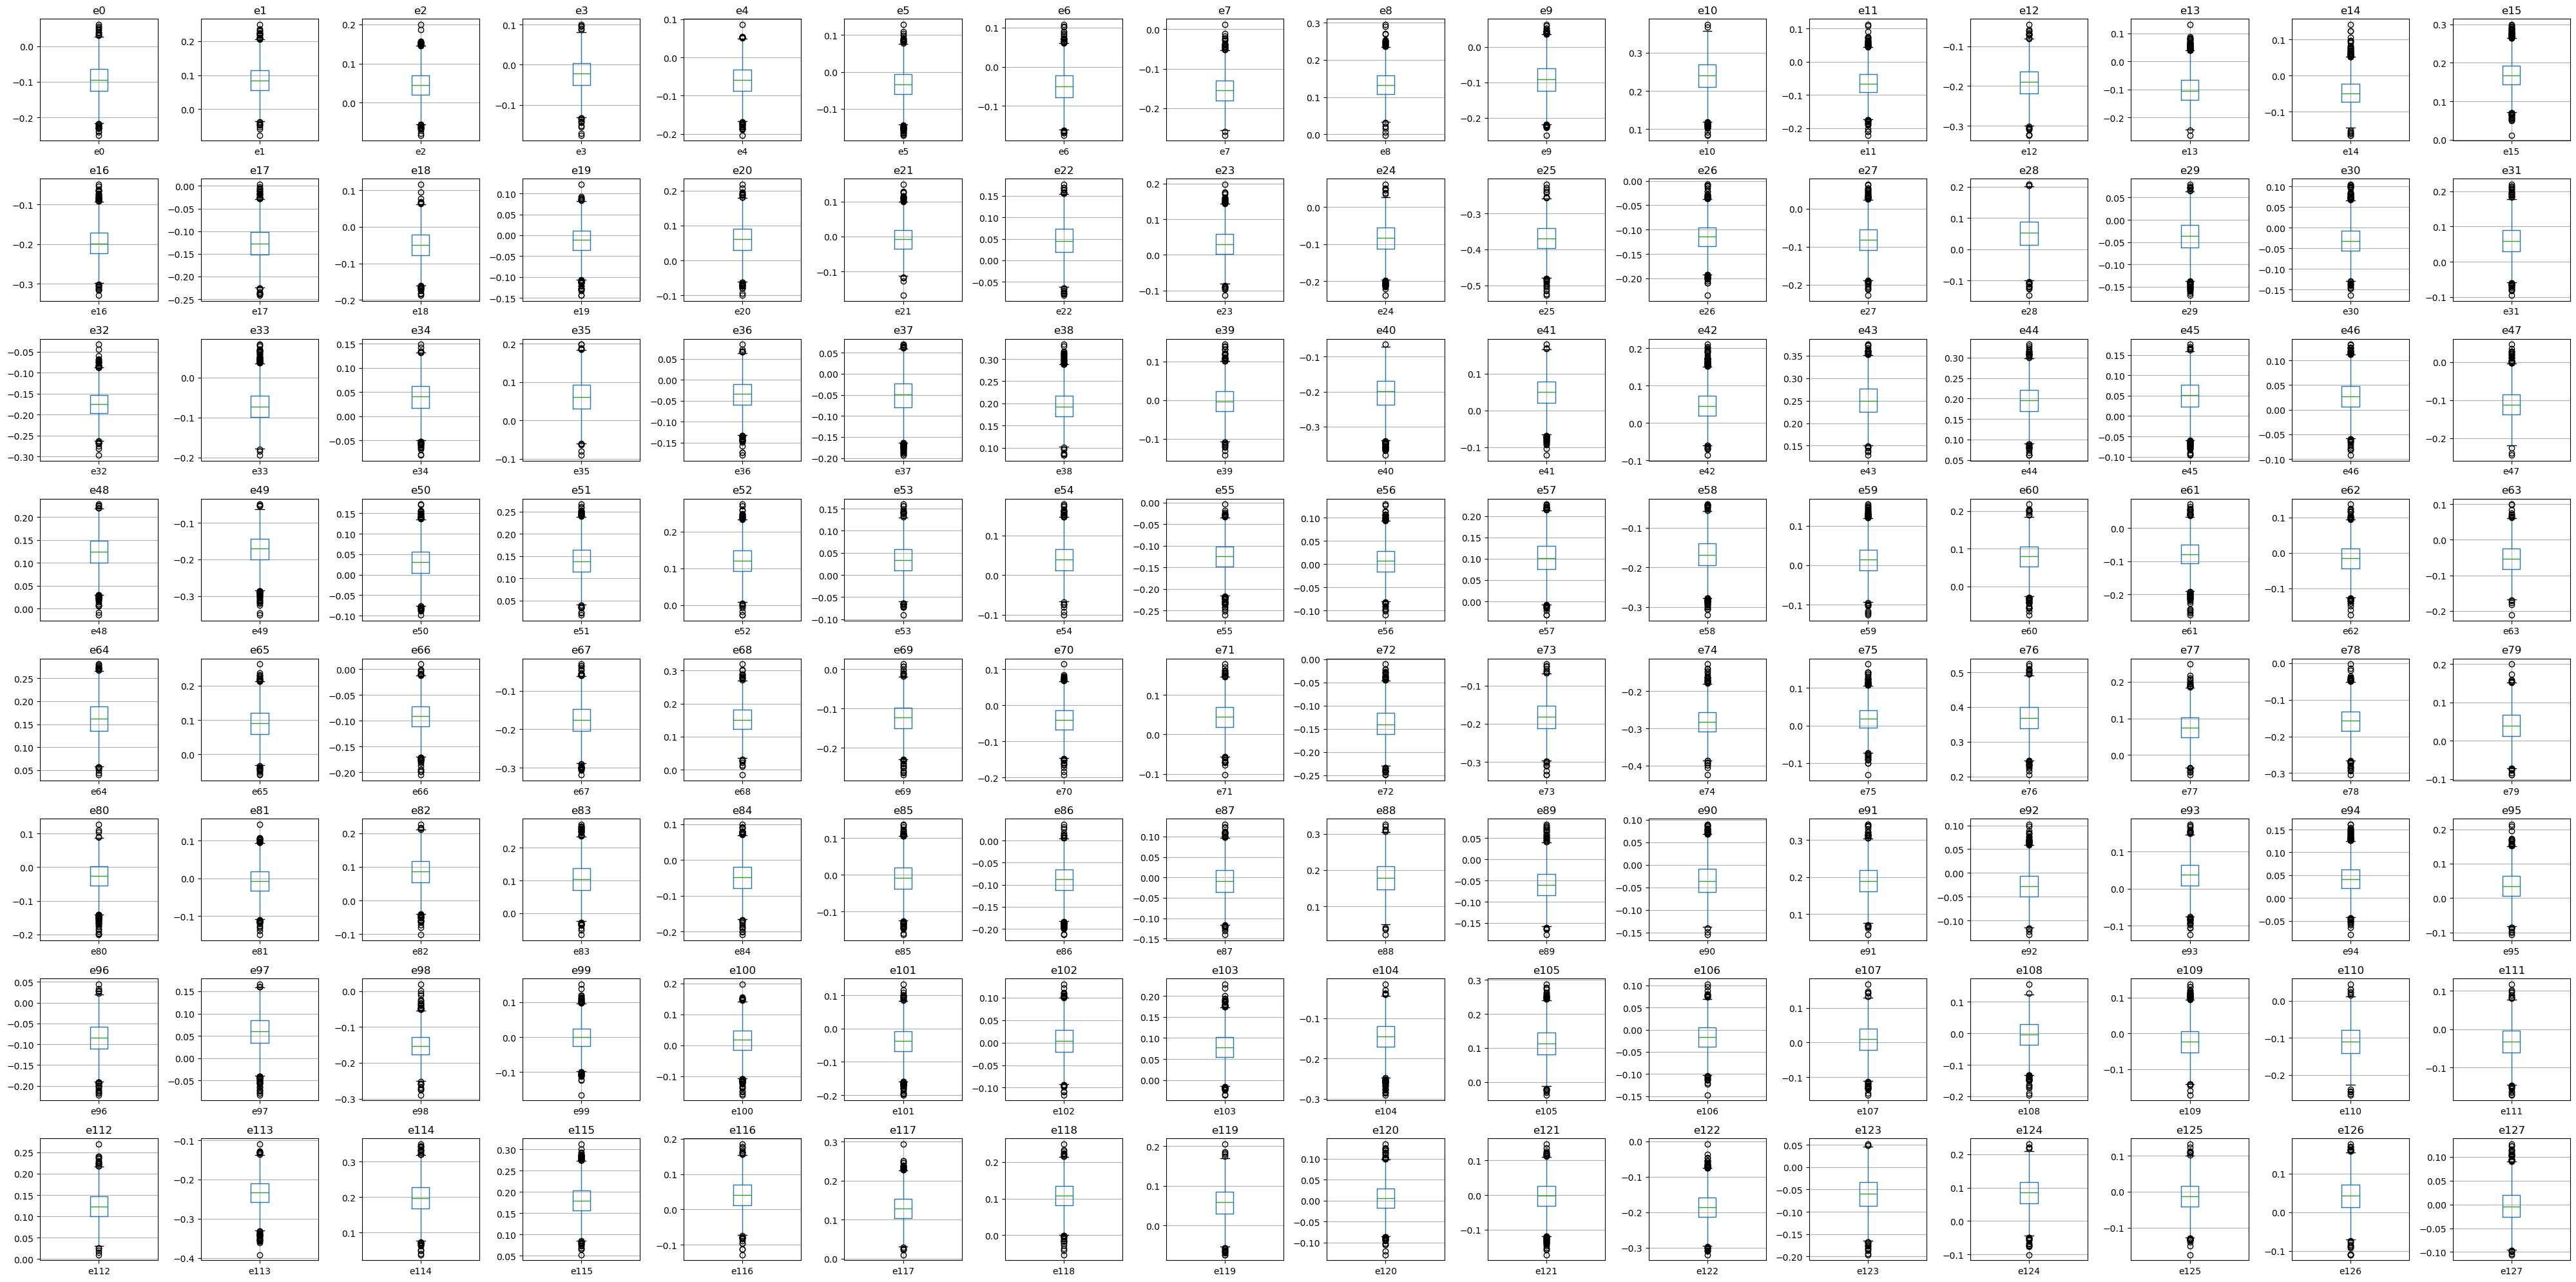

In [392]:
fig, axs = plt.subplots(8, 16, figsize = (40, 20))
axs = axs.flatten()
df2 = df.drop("gender", axis = 1)
for i, col in enumerate(df2.columns):
    df.boxplot(column = col, ax = axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

### **Histogram Interpretation**

**Keys :**

Histograms shows us the data distribution for a single continuous variable. The X-axis shows the range of values and Y-axis represent the number of values in that range. The ideal outcome for histogram is a bell curve or slightly skewed bell curve. and Nomal distribution.

***********************************************************

**Interpretation**

**Selected Continuous Variables :**

* **e0 - e127 :** Selected. Slightly positive skewed distribution, acceptable. but **e99 and e100** is risk to be outliner then we visualiza at histograms. for more information

array([[<Axes: title={'center': 'e99'}>,
        <Axes: title={'center': 'e100'}>]], dtype=object)

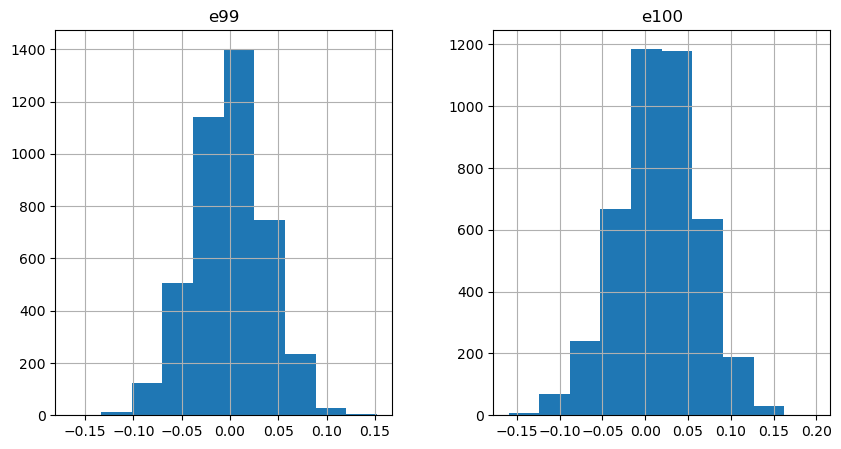

In [393]:
df.hist(['e99', 'e100'], figsize = (10,5))

* **e99, e100** : histograms display a bell curve that is slightly skewed, indicating a deviation from a perfect normal distribution, So we still selected this attributes.

# **Outlier treatment**

**Keys :**

Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

**Why I should treat the outliers?**

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

* **Option-1:** Delete the outlier Records. Only if there are just few rows lost.
* **Option-2**: Impute the outlier values with a logical business value
* **Option-3**: Replace outliers by looking at the histogram and boxplot

`In this data none of the continuous predictors had outliers, hence treatment is not required.`

# **Missing values treatment**

**Keys :**

Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

* Delete the missing value rows if there are only few records
* Impute the missing values with `MEAN` or `MEDIAN` value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

In [394]:
df.isnull().sum()

gender    0
e0        0
e1        0
e2        0
e3        0
         ..
e123      0
e124      0
e125      0
e126      0
e127      0
Length: 129, dtype: int64

No missing values in this data!!

# **Feature selection by Visual correlation analysis and Statistical measurement**

**Keys :**

Now its time to finally choose the best columns(attributes) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

**Visual exploration of relationship between variables**
* Categorical Vs Continuous ---- Box Plot
* Continuous Vs Continuous ---- Scatter Plot

### **Relationship exploration: Categorical Vs Continuous -- Box Plots and Pair Plot (In case target variable is Categorical and all predictor variable is Continuous)**

The graph below illustrates attributes plotted against the target variable to explore their relationship. Subsequently, all attributes that exhibit a relation lower than 50% with the target variable are removed.

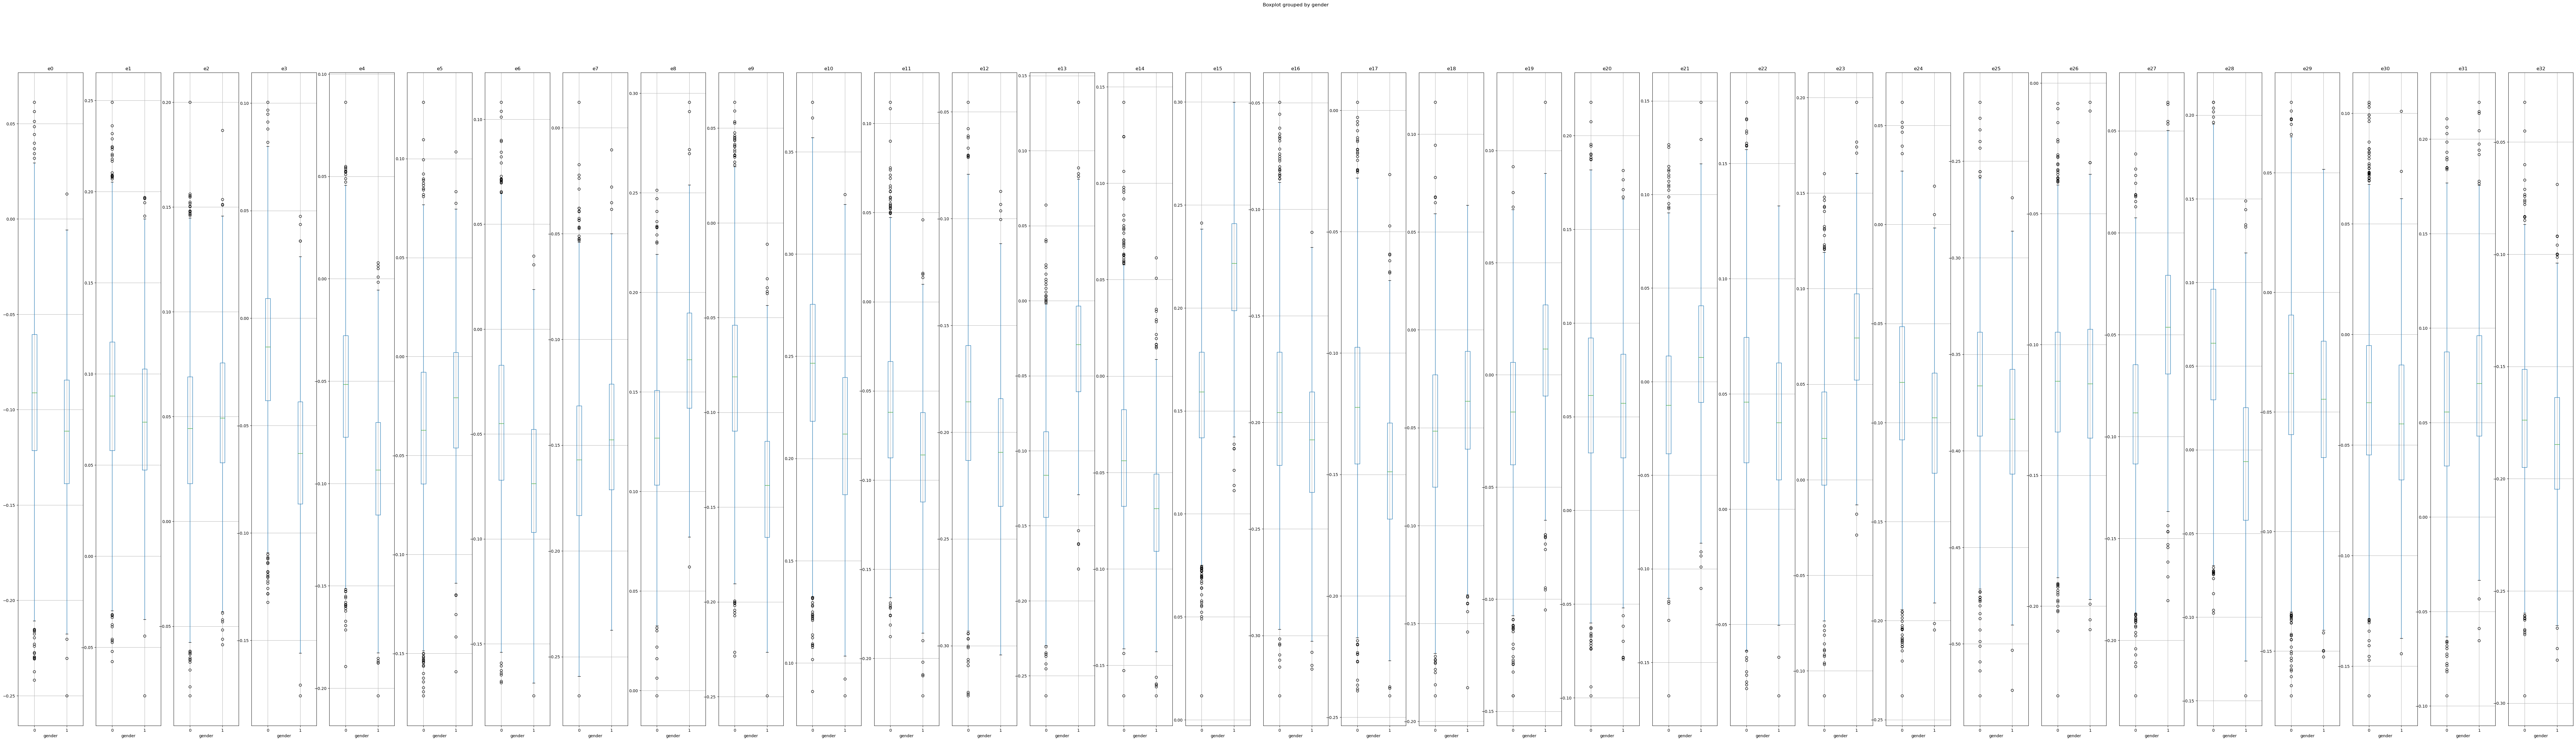

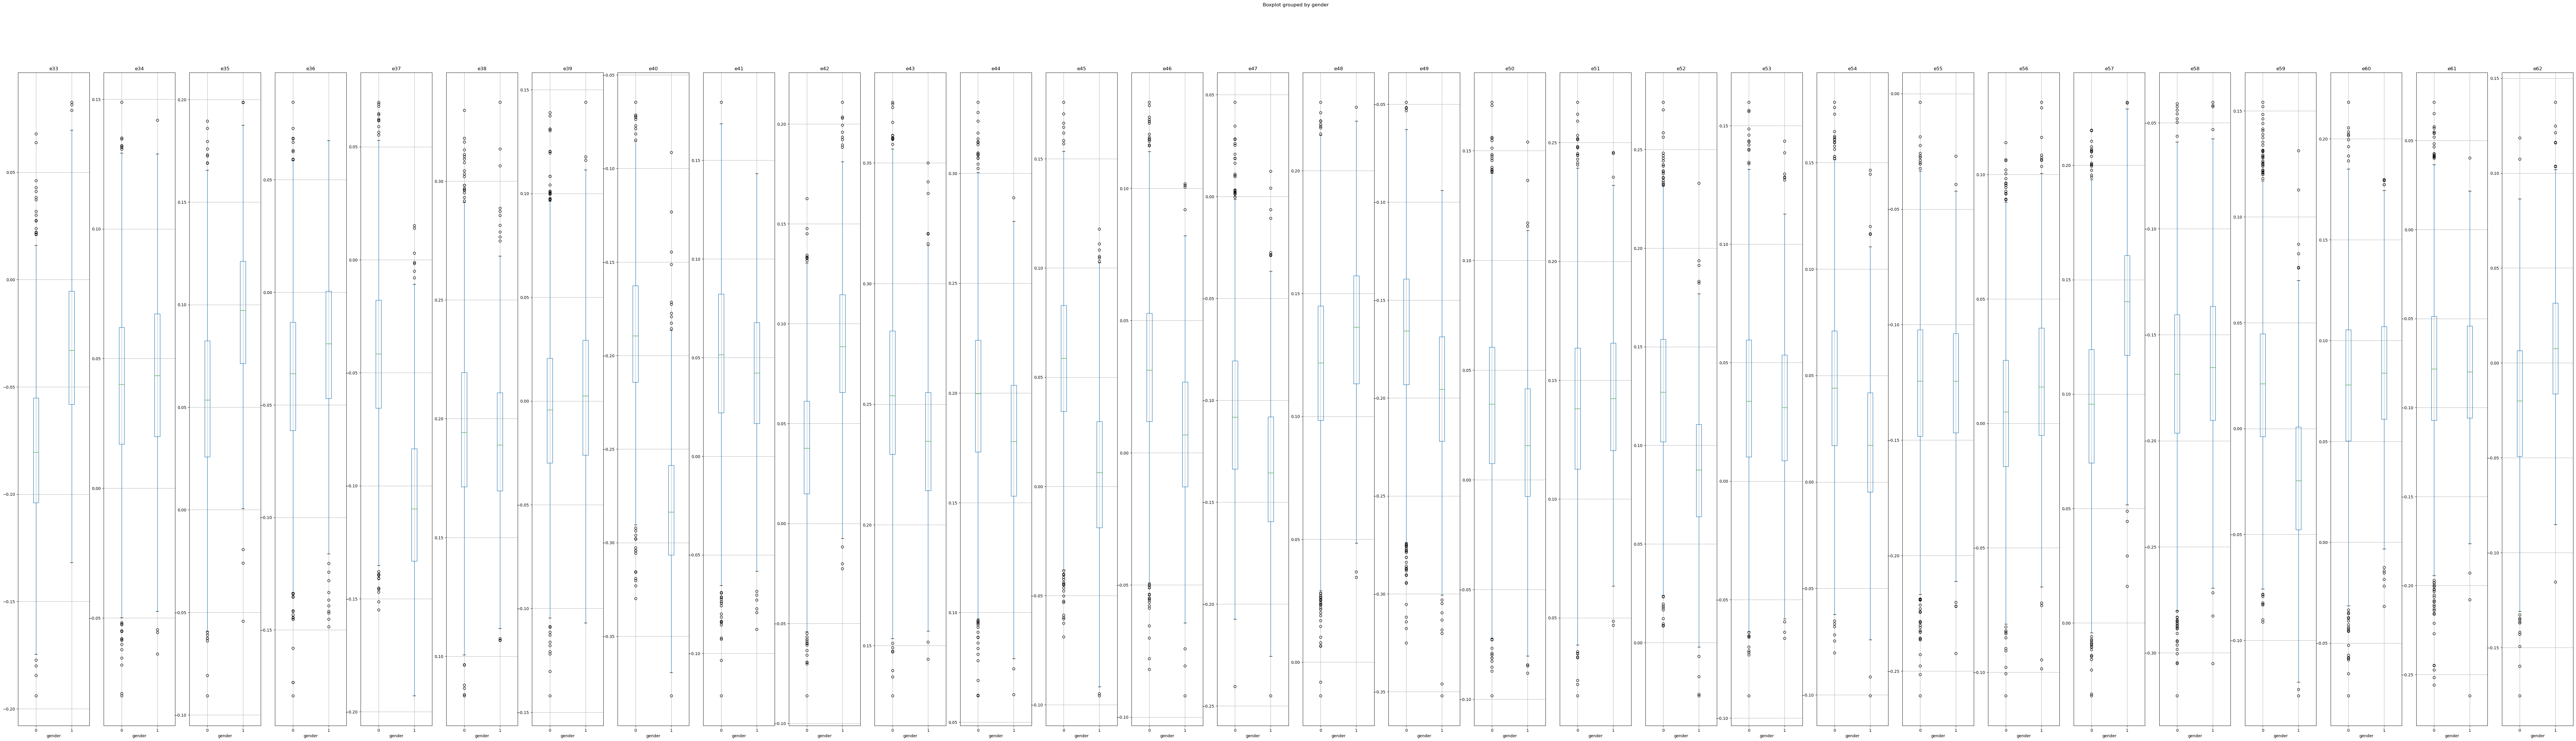

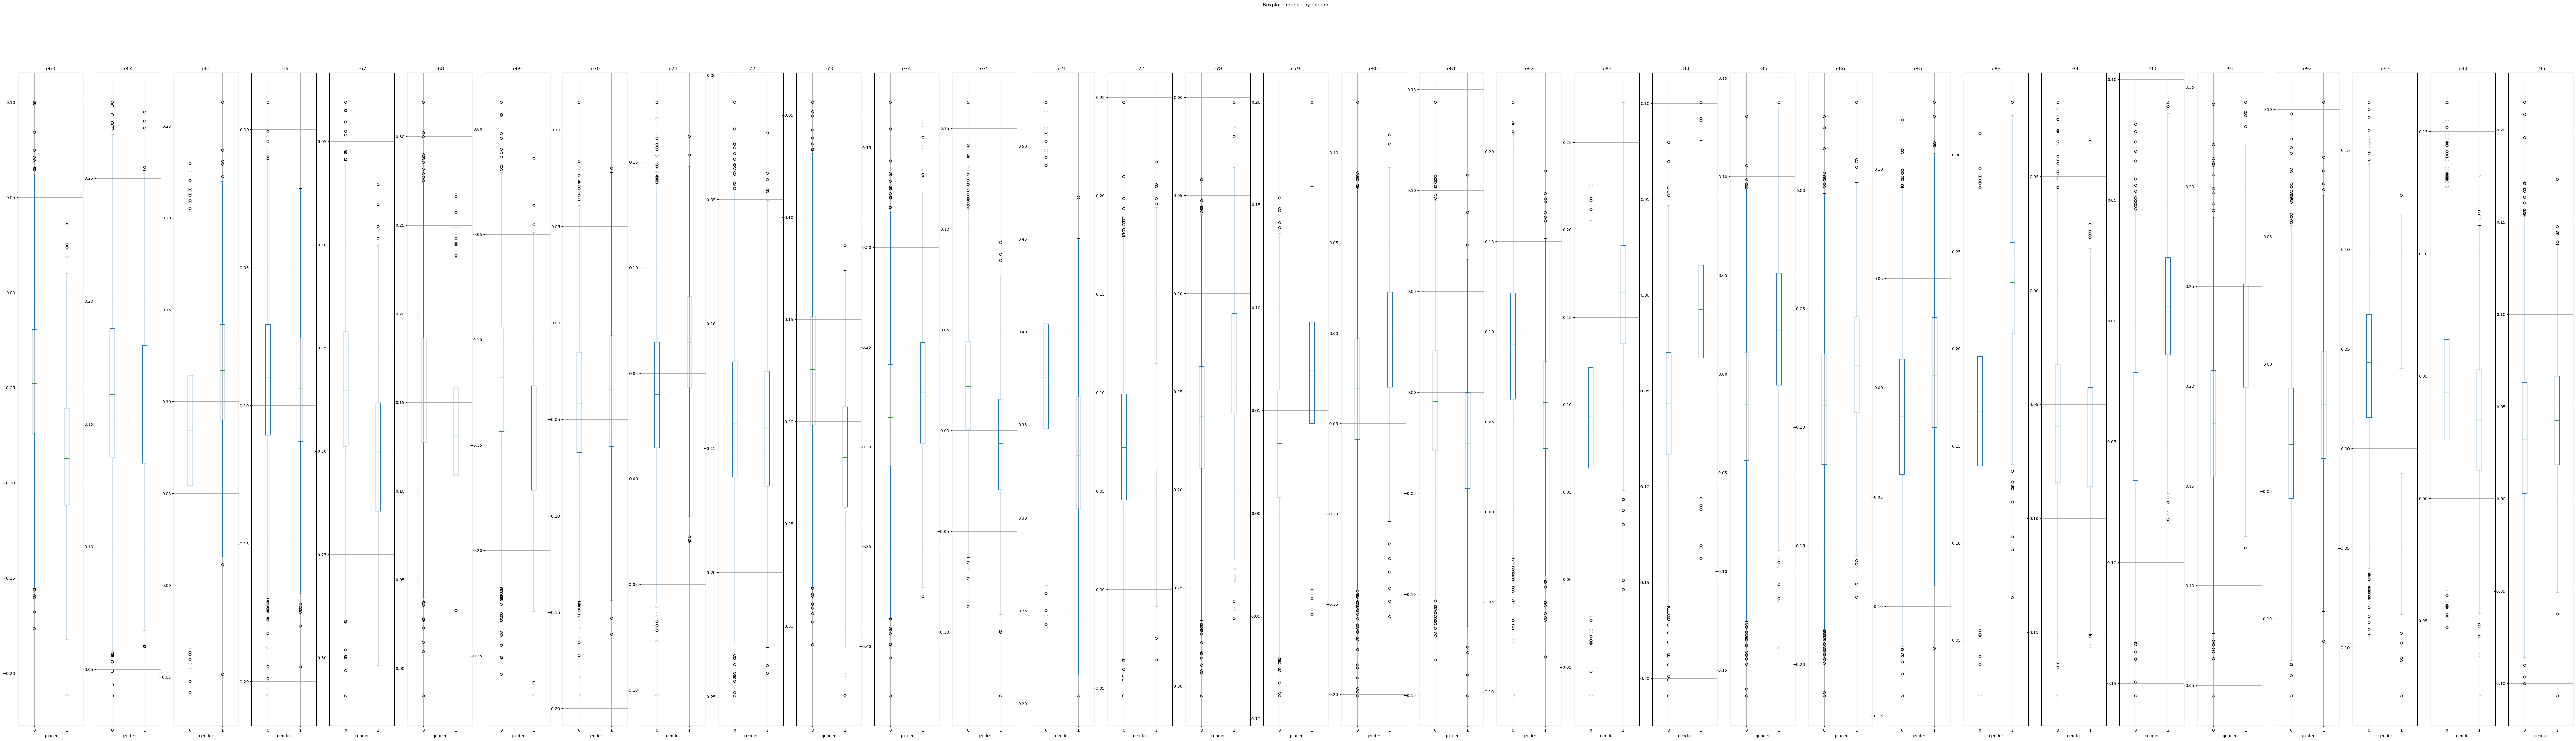

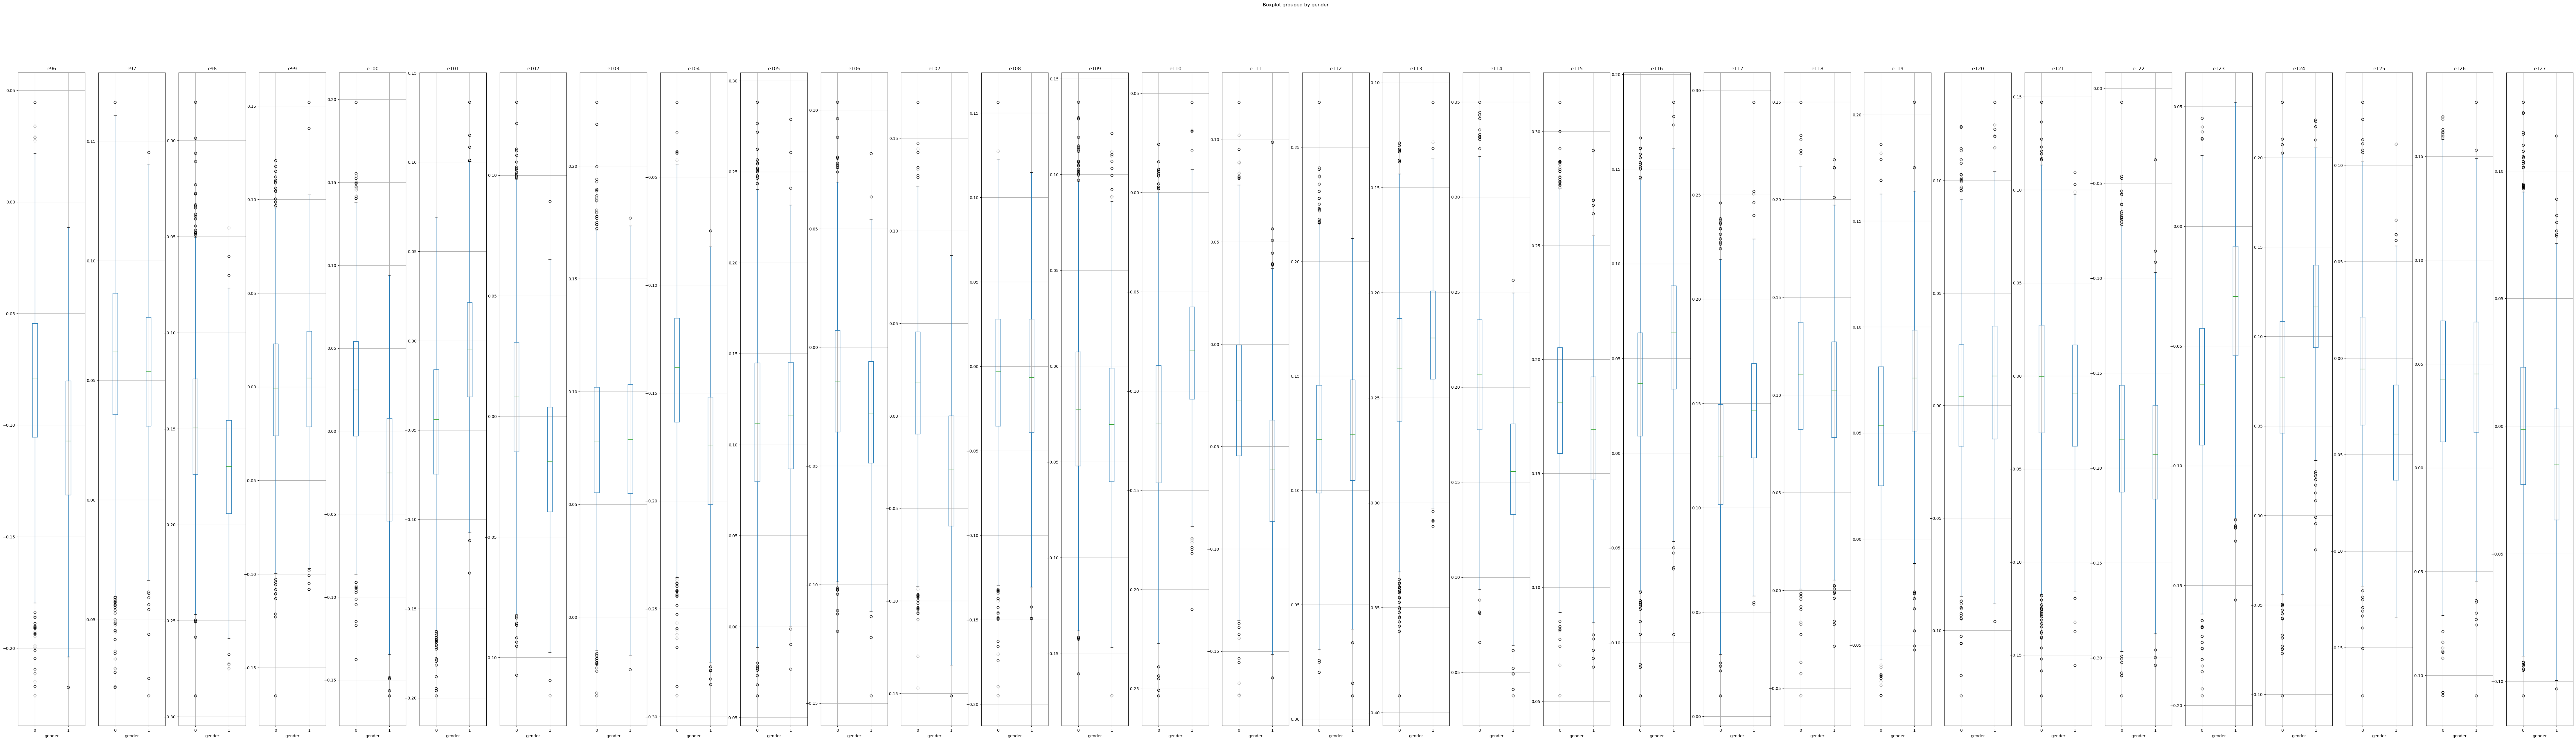

In [395]:
ContinuousColsList_1 = ['e0', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9',
                        'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 
                        'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25', 'e26', 'e27', 
                        'e28', 'e29', 'e30', 'e31', 'e32']

fig, PlotCanvas = plt.subplots(nrows = 1, ncols = len(ContinuousColsList_1), figsize = (110,30))
for PredictorCol , i in zip(ContinuousColsList_1, range(len(ContinuousColsList_1))):
    df.boxplot(column = PredictorCol, by = 'gender', figsize = (15,10), vert = True, ax = PlotCanvas[i])

ContinuousColsList_2 = ['e33', 'e34', 'e35', 'e36', 
                        'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45', 
                        'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'e53', 'e54', 
                        'e55', 'e56', 'e57', 'e58', 'e59', 'e60', 'e61', 'e62']

fig, PlotCanvas = plt.subplots(nrows = 1, ncols = len(ContinuousColsList_2), figsize = (110,30))
for PredictorCol , i in zip(ContinuousColsList_2, range(len(ContinuousColsList_2))):
    df.boxplot(column = PredictorCol, by = 'gender', figsize = (15,10), vert = True, ax = PlotCanvas[i])


ContinuousColsList_3 = ['e63', 'e64', 'e65', 'e66', 'e67', 
                        'e68', 'e69', 'e70', 'e71', 'e72', 'e73', 'e74', 'e75', 
                        'e76', 'e77', 'e78', 'e79', 'e80', 'e81', 'e82', 'e83', 
                        'e84', 'e85', 'e86', 'e87', 'e88', 'e89', 'e90', 'e91', 
                        'e92', 'e93', 'e94', 'e95']

fig, PlotCanvas = plt.subplots(nrows = 1, ncols = len(ContinuousColsList_3), figsize = (110,30))
for PredictorCol , i in zip(ContinuousColsList_3, range(len(ContinuousColsList_3))):
    df.boxplot(column = PredictorCol, by = 'gender', figsize = (15,10), vert = True, ax = PlotCanvas[i])

ContinuousColsList_4 = ['e96', 'e97', 'e98', 'e99', 
                        'e100', 'e101', 'e102', 'e103', 'e104', 'e105', 'e106', 'e107', 
                        'e108', 'e109', 'e110', 'e111', 'e112', 'e113', 'e114', 'e115', 
                        'e116', 'e117', 'e118', 'e119', 'e120', 'e121', 'e122', 'e123', 
                        'e124', 'e125', 'e126', 'e127']

fig, PlotCanvas = plt.subplots(nrows = 1, ncols = len(ContinuousColsList_4), figsize = (110,30))
for PredictorCol , i in zip(ContinuousColsList_4, range(len(ContinuousColsList_4))):
    df.boxplot(column = PredictorCol, by = 'gender', figsize = (15,10), vert = True, ax = PlotCanvas[i])

In [396]:
unused = ['e0', 'e1', 'e2', 'e5', 'e7', 'e11', 'e12', 'e16', 'e18', 'e20', 
          'e21', 'e22', 'e24', 'e25', 'e26', 'e29', 'e30', 'e31', 'e32', 
          'e34', 'e36', 'e38', 'e39', 'e41', 'e43', 'e44', 'e47', 'e48', 
          'e49', 'e50', 'e51', 'e53', 'e55', 'e56', 'e58', 'e60', 'e61', 
          'e64', 'e66', 'e68', 'e70', 'e71', 'e72', 'e74', 'e77', 'e78', 
          'e80', 'e81', 'e86', 'e87', 'e89', 'e92', 'e94', 'e95', 'e97', 
          'e98', 'e99', 'e103', 'e105', 'e106', 'e108', 'e109', 'e112', 
          'e113', 'e115', 'e116', 'e117', 'e118', 'e119', 'e120', 'e121', 
          'e122', 'e126', 'e127']

for i in range(len(unused)):
    df = df.drop(unused[i], axis = 1)
df.head()

gender        e3        e4        e6        e8        e9       e10  \
0       0  0.044232 -0.119152 -0.023316  0.128055 -0.056695  0.235196   
1       0  0.068055 -0.055688  0.000100  0.151631 -0.062965  0.223130   
2       0 -0.055684 -0.034180 -0.050120  0.105163 -0.022765  0.184726   
3       0 -0.055712 -0.070551  0.051755  0.119448 -0.007768  0.205875   
4       0 -0.065106 -0.052364 -0.074878  0.153823 -0.105806  0.235165   

        e13       e14       e15  ...      e101      e102      e104      e107  \
0 -0.046592 -0.026436  0.171891  ...  0.014950  0.048412 -0.112223  0.029790   
1 -0.102084 -0.049401  0.171306  ... -0.028867  0.060836 -0.102751 -0.054320   
2 -0.156773 -0.071914  0.179454  ... -0.037727 -0.007408 -0.129364 -0.006053   
3 -0.009706 -0.043895  0.105138  ... -0.099393  0.057393 -0.170254 -0.068315   
4 -0.068892 -0.022961  0.123034  ... -0.056947  0.008373 -0.206117 -0.085720   

       e110      e111      e114      e123      e124      e125  
0 -0.088052 -0.018031  0.209749 -0.061043  0.066998 -0.027978  
1 -0.180555 -0.001604  0.207263 -0.118607  0.056703 -0.017975  
2 -0.166535 -0.012306  0.201304 -0.149271  0.082800  0.068550  
3 -0.051611  0.017096  0.259534 -0.065476  0.011952  0.078020  
4 -0.176906 -0.035432  0.177291 -0.063348  0.172399 -0.001473  

[5 rows x 55 columns]

The subsequent step involves identifying the relation between attributes and selecting one based on its relation with the target variable. The attribute showing the strongest relation with the target variable is chosen for training the model.

In [397]:
correlation_matrix = df.corr()
threshold = 0.5
high_corr_feature_pairs = []
tuples = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if (correlation_matrix.iloc[i, j] > threshold) or (correlation_matrix.iloc[i, j] < -threshold):
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            high_corr_feature_pairs.append((feature1, feature2))

print("Feature pairs with correlation above 0.5 or below -0.5 :")

for pair in high_corr_feature_pairs:
    tuples.append(pair)
    print(pair)
print("=========================================================================")
unique_elements = set()
for i in tuples:
    for element in i:
        if element.startswith('e'):
            unique_elements.add(element)
print("Attributes that have a strong correlation with target :", unique_elements)

Feature pairs with correlation above 0.5 or below -0.5 :
('gender', 'e13')
('gender', 'e15')
('gender', 'e37')
('gender', 'e40')
('gender', 'e42')
('gender', 'e83')
('gender', 'e88')
('e15', 'e37')
('e15', 'e40')
('e15', 'e83')
('e19', 'e40')
('e40', 'e83')
('e40', 'e88')
('e83', 'e84')
Attributes that have a strong correlation with target : {'e37', 'e88', 'e83', 'e40', 'e84', 'e19', 'e13', 'e15', 'e42'}


In [398]:
unused = ['e15', 'e40','e84']
for i in range(len(unused)):
    df = df.drop(unused[i], axis = 1)
df.head()

gender        e3        e4        e6        e8        e9       e10  \
0       0  0.044232 -0.119152 -0.023316  0.128055 -0.056695  0.235196   
1       0  0.068055 -0.055688  0.000100  0.151631 -0.062965  0.223130   
2       0 -0.055684 -0.034180 -0.050120  0.105163 -0.022765  0.184726   
3       0 -0.055712 -0.070551  0.051755  0.119448 -0.007768  0.205875   
4       0 -0.065106 -0.052364 -0.074878  0.153823 -0.105806  0.235165   

        e13       e14       e17  ...      e101      e102      e104      e107  \
0 -0.046592 -0.026436 -0.111775  ...  0.014950  0.048412 -0.112223  0.029790   
1 -0.102084 -0.049401 -0.038605  ... -0.028867  0.060836 -0.102751 -0.054320   
2 -0.156773 -0.071914 -0.117138  ... -0.037727 -0.007408 -0.129364 -0.006053   
3 -0.009706 -0.043895 -0.122768  ... -0.099393  0.057393 -0.170254 -0.068315   
4 -0.068892 -0.022961 -0.131401  ... -0.056947  0.008373 -0.206117 -0.085720   

       e110      e111      e114      e123      e124      e125  
0 -0.088052 -0.018031  0.209749 -0.061043  0.066998 -0.027978  
1 -0.180555 -0.001604  0.207263 -0.118607  0.056703 -0.017975  
2 -0.166535 -0.012306  0.201304 -0.149271  0.082800  0.068550  
3 -0.051611  0.017096  0.259534 -0.065476  0.011952  0.078020  
4 -0.176906 -0.035432  0.177291 -0.063348  0.172399 -0.001473  

[5 rows x 52 columns]

# **Selecting final predictors for Machine Learning summary**

Based on the above tests, selecting the final columns for machine learning

In [399]:
df.head()

gender        e3        e4        e6        e8        e9       e10  \
0       0  0.044232 -0.119152 -0.023316  0.128055 -0.056695  0.235196   
1       0  0.068055 -0.055688  0.000100  0.151631 -0.062965  0.223130   
2       0 -0.055684 -0.034180 -0.050120  0.105163 -0.022765  0.184726   
3       0 -0.055712 -0.070551  0.051755  0.119448 -0.007768  0.205875   
4       0 -0.065106 -0.052364 -0.074878  0.153823 -0.105806  0.235165   

        e13       e14       e17  ...      e101      e102      e104      e107  \
0 -0.046592 -0.026436 -0.111775  ...  0.014950  0.048412 -0.112223  0.029790   
1 -0.102084 -0.049401 -0.038605  ... -0.028867  0.060836 -0.102751 -0.054320   
2 -0.156773 -0.071914 -0.117138  ... -0.037727 -0.007408 -0.129364 -0.006053   
3 -0.009706 -0.043895 -0.122768  ... -0.099393  0.057393 -0.170254 -0.068315   
4 -0.068892 -0.022961 -0.131401  ... -0.056947  0.008373 -0.206117 -0.085720   

       e110      e111      e114      e123      e124      e125  
0 -0.088052 -0.018031  0.209749 -0.061043  0.066998 -0.027978  
1 -0.180555 -0.001604  0.207263 -0.118607  0.056703 -0.017975  
2 -0.166535 -0.012306  0.201304 -0.149271  0.082800  0.068550  
3 -0.051611  0.017096  0.259534 -0.065476  0.011952  0.078020  
4 -0.176906 -0.035432  0.177291 -0.063348  0.172399 -0.001473  

[5 rows x 52 columns]

Plot the graph of 2 attributes that have a strong relation to target.

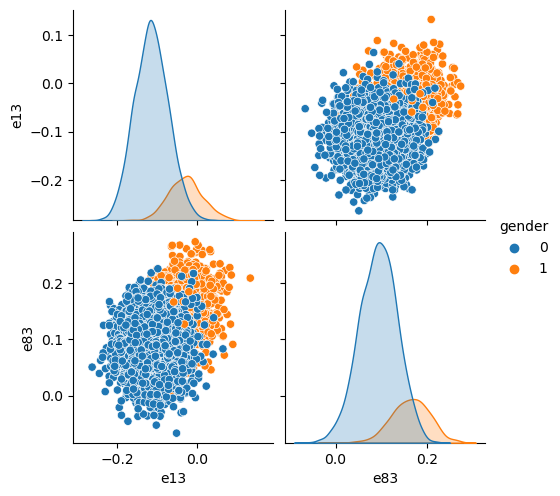

In [400]:
plot = df[["gender","e13", "e83"]]
sns.pairplot(plot, hue = "gender")

# **Data Pre-processing for Machine Learning**

**Keys :**

List of steps performed on predictor variables before data can be used for machine learning

1. Selecting data
2. Data Transformation (Optional): Standardization/Normalization/log/sqrt. for KNN algorithms down below
3. Splitting the data into Training and Testing sample

**Selecting Data for training**

In [401]:
target = df['gender']
attributes = df.drop('gender', axis = 1)

**Standardization/Normalization of data**

In [402]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [403]:
# scale attributes for knn model
scaler = MinMaxScaler()
x_scaled = scaler.fit(attributes)
knn_attributes = x_scaled.transform(attributes)

**Splitting the data into Training and Testing sample**

We do not use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [404]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(attributes, target, test_size = 0.3, random_state = 143438)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2938, 51)
(2938,)
(1260, 51)
(1260,)


# **Model construction**

**Keys :**

Experimental design to test :
* the performance of each machine learning model and find the best model.
* the performance of the model between predictors that have a strong relationship with the target, and add or delist doubt predictors to the model.
* the performance of the model by doing data transformation or eliminating outliers in doubt predictors.

In the case, we set the experimental design to find the best ML model when using the features that strongly correlate to the taget as the predictors of the ML models.


## **Logistic Regression Model**

In [405]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

------------------------------------------------------- training set -----------------------------------------------------------------


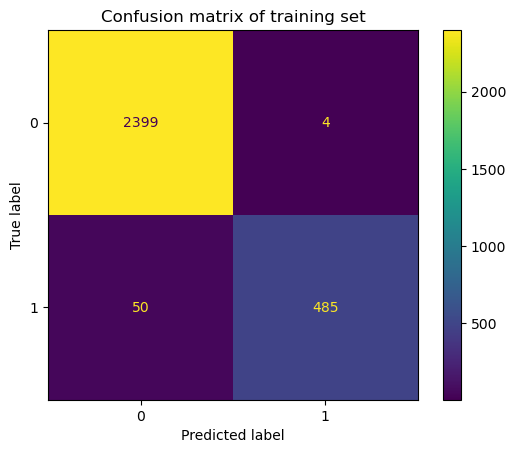

Accuracy: 0.9816201497617427
Precision: 0.9918200408997955
Recall: 0.9065420560747663
------------------------------------------------------- test set -----------------------------------------------------------------


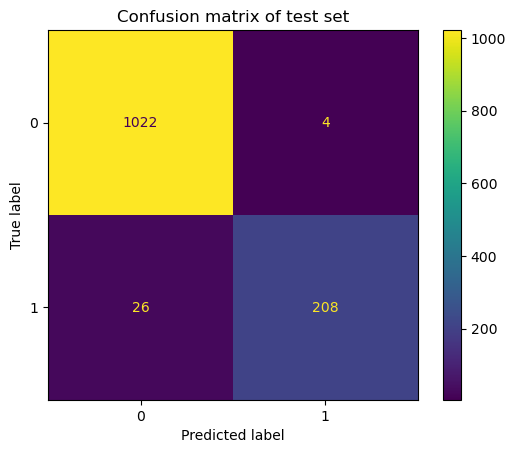

Accuracy: 0.9761904761904762
Precision: 0.9811320754716981
Recall: 0.8888888888888888
--------------------------------------------------------------------------------------------------------------------------------------


In [406]:
# applied logistic model -------------------------------------------------------------------------------------------------------------
logistic = LogisticRegression()
logistic.fit(x_train,y_train)

# train model 70 % -------------------------------------------------------------------------------------------------------------------
print("------------------------------------------------------- training set -----------------------------------------------------------------")
y_pred = logistic.predict(x_train)
cm = confusion_matrix(y_true = y_train, y_pred = y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = list(set(y_train)))
disp.plot()
plt.title('Confusion matrix of training set')
plt.show()
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# test model 30 % --------------------------------------------------------------------------------------------------------------------
print("------------------------------------------------------- test set -----------------------------------------------------------------")
y_pred = logistic.predict(x_test)
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = list(set(y_test)))
disp.plot()
plt.title('Confusion matrix of test set')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("--------------------------------------------------------------------------------------------------------------------------------------")

## **Decision Trees**

In [407]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

------------------------------------------------------- training set -----------------------------------------------------------------


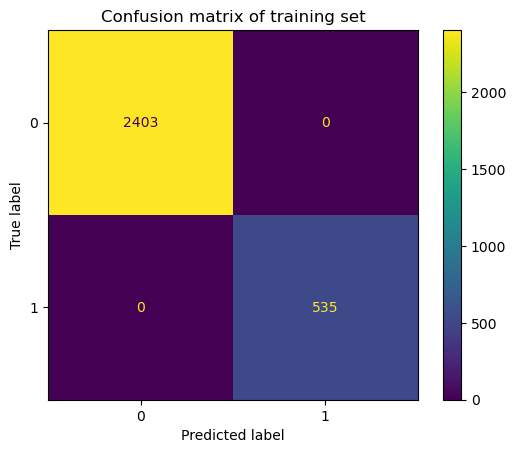

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
------------------------------------------------------- test set -----------------------------------------------------------------


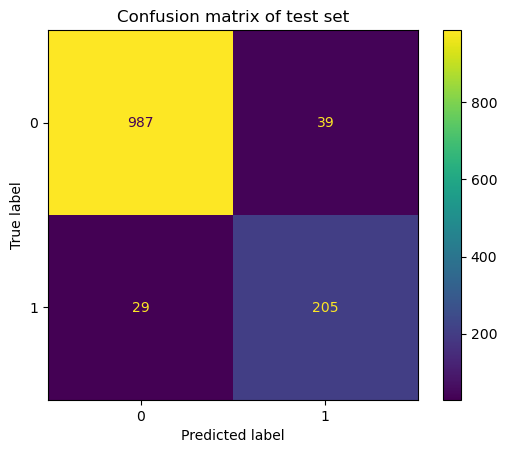

Accuracy: 0.946031746031746
Precision: 0.8401639344262295
Recall: 0.8760683760683761
--------------------------------------------------------------------------------------------------------------------------------------


In [408]:
# applied decision tree model -------------------------------------------------------------------------------------------------------------
DecisionTree = DecisionTreeClassifier()
DecisionTree = DecisionTree.fit(x_train,y_train)

# train model 70 % -------------------------------------------------------------------------------------------------------------------
print("------------------------------------------------------- training set -----------------------------------------------------------------")
y_pred = DecisionTree.predict(x_train)
cm = confusion_matrix(y_true = y_train, y_pred = y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = list(set(y_train)))
disp.plot()
plt.title('Confusion matrix of training set')
plt.show()
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


# test model 30 % --------------------------------------------------------------------------------------------------------------------
print("------------------------------------------------------- test set -----------------------------------------------------------------")
y_pred = DecisionTree.predict(x_test)
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = list(set(y_test)))
disp.plot()
plt.title('Confusion matrix of test set')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("--------------------------------------------------------------------------------------------------------------------------------------")

In [409]:
from sklearn.tree import export_text
feature_names = []
for col in attributes.columns:
    feature_names.append(col)
print(export_text(DecisionTree, feature_names = feature_names))

|--- e37 <= -0.09
|   |--- e13 <= -0.07
|   |   |--- e42 <= 0.07
|   |   |   |--- e19 <= 0.05
|   |   |   |   |--- e27 <= 0.00
|   |   |   |   |   |--- e96 <= -0.15
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- e96 >  -0.15
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- e27 >  0.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- e19 >  0.05
|   |   |   |   |--- class: 1
|   |   |--- e42 >  0.07
|   |   |   |--- e83 <= 0.13
|   |   |   |   |--- e8 <= 0.12
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- e8 >  0.12
|   |   |   |   |   |--- class: 1
|   |   |   |--- e83 >  0.13
|   |   |   |   |--- class: 1
|   |--- e13 >  -0.07
|   |   |--- e28 <= 0.07
|   |   |   |--- e101 <= -0.09
|   |   |   |   |--- class: 0
|   |   |   |--- e101 >  -0.09
|   |   |   |   |--- e110 <= -0.16
|   |   |   |   |   |--- e73 <= -0.23
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- e73 >  -0.23
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- e11

## **K-nearest neighbor**

k value :  [0.9752247573642091, 0.9766547477155344, 0.9818948294454849, 0.9823710199216755, 0.982847210397866, 0.9835620636812532, 0.9835620636812532, 0.9823710199216753, 0.9833234008740565, 0.9833234008740565, 0.9835617798967025, 0.9830858732050627, 0.982847210397866, 0.9840385379419946, 0.9833239684431578, 0.983562347465804, 0.9845150122027357, 0.9830858732050627, 0.9835620636812532, 0.9835626312503548, 0.98380072648845, 0.9835626312503548, 0.9840385379419944, 0.984039105511096, 0.9840388217265452, 0.9842772007491913, 0.9842769169646406, 0.9842766331800897, 0.9845152959872865, 0.9838004427038992]
best k value : 29


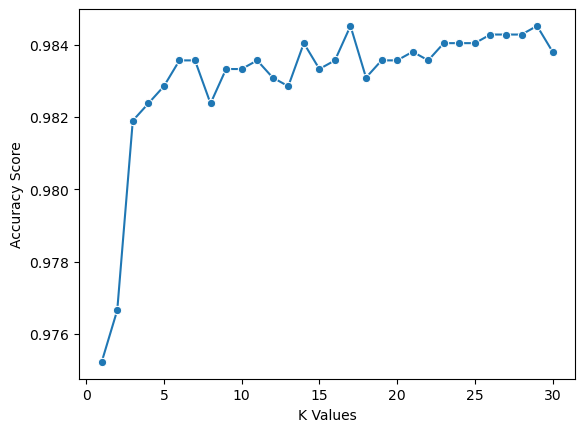

In [410]:
from sklearn.neighbors import KNeighborsClassifier 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    # cv : splitting the dataset into multiple subsets, 
    # then using these folds as separate training and validation sets 
    # to evaluate the model's performance
    score = cross_val_score(knn, knn_attributes, target, cv = 5) 
    scores.append(np.mean(score))
print("k value : ", scores)

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

best_index = np.argmax(scores)
best_k = k_values[best_index] # index = 12, k = 13
print("best k value :", best_k)

------------------------------------------------------- training set -----------------------------------------------------------------


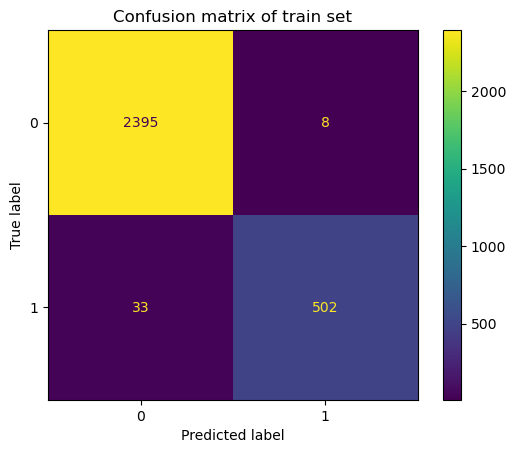

Accuracy: 0.9860449285228047
Precision: 0.984313725490196
Recall: 0.9383177570093458
------------------------------------------------------- test set -----------------------------------------------------------------


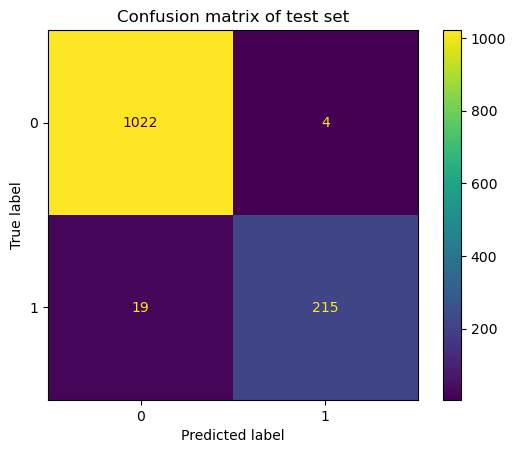

Accuracy: 0.9817460317460317
Precision: 0.9817351598173516
Recall: 0.9188034188034188
--------------------------------------------------------------------------------------------------------------------------------------


In [411]:
# applied knn model ------------------------------------------------------------------------------------------------------------------
knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(x_train, y_train)

# train model 70 % -------------------------------------------------------------------------------------------------------------------
print("------------------------------------------------------- training set -----------------------------------------------------------------")
y_pred = knn.predict(x_train)
cm = confusion_matrix(y_true = y_train, y_pred = y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = list(set(y_train)))
disp.plot()
plt.title('Confusion matrix of train set')
plt.show()
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# test model 30 % --------------------------------------------------------------------------------------------------------------------
print("------------------------------------------------------- test set -----------------------------------------------------------------")
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = list(set(y_test)))
disp.plot()
plt.title('Confusion matrix of test set')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("--------------------------------------------------------------------------------------------------------------------------------------")

# **Results Analysis**

**Introduction :**
The primary objective of this case study is to predict a candidate's gender based on images of their constituency. The approach involves exploring and preprocessing the data to prepare for model training.

**Feature Selection :**
Selecting relevant attributes that effectively represent the necessary information is vital for the model's performance. Filtering out attributes below a specific threshold, like a correlation or importance level of 0.5, aims to retain the most informative features. In complex data scenarios, reevaluating or iterating on feature selection might be necessary to ensure the model utilizes the most relevant information.

**Periodic Reassessment :**
Regularly revisiting feature selection approaches, testing different feature subsets, and exploring various feature engineering techniques helps ensure the model uses the most informative features. Leveraging domain knowledge and experimenting with different feature selection methods further improves model performance.

**Model Performance Evaluation :**
The models employed — `Logistic Regression`, `Decision Tree`, and `K-nearest neighbor` — were assessed to ensure generalizability and prevent overfitting, each model's performance metrics were assessed. It was observed that during the training phase, all models achieved accuracy, precision, and recall scores above 0.90. During testing, the models maintained accuracy, precision, and recall scores above 0.85. This suggests that the models did not overly memorize the training data, as their performance on unseen data (testing) remained robust.


**Model Performance Measurements :**

*Logistic Regression :*
- Training set :
  - Accuracy : 0.9816
  - Precision : 0.9918
  - Recall : 0.9065
- Test set :
  - Accuracy : 0.9762
  - Precision : 0.9811
  - Recall : 0.8889

*Decision Tree :*
- Training set :
  - Accuracy : 1.0
  - Precision : 1.0
  - Recall : 1.0
- Test set :
  - Accuracy : 0.9468
  - Precision : 0.8465
  - Recall : 0.8718

*K-nearest neighbor :*
- Training set :
  - Accuracy : 0.9860
  - Precision : 0.9843
  - Recall : 0.9383
- Test set :
  - Accuracy : 0.9817
  - Precision : 0.9817
  - Recall : 0.9188

**Model Ranking :**
Based on the test set evaluation, the performance ranking of the models is as follows : `K-nearest neighbor` > `Logistic Regression` > `Decision Tree`.

**Addressing Class Imbalance :**
In cases of imbalanced datasets, with significantly fewer instances of one gender, the model's predictive capabilities can be affected, leading to higher misclassification errors for the underrepresented class.

Mitigation Strategies :
- Collecting more data for the underrepresented class can improve the model's generalization and reduce misclassification errors.
- Employing data augmentation techniques and targeted data collection for the underrepresented class can effectively address class imbalance and enhance the model's efficiency.

**Data Transformation and Outliers :**
Comparing the model performance after applying data transformations in `K-nearest neighbor` did not yield significant improvements. This could be due to attributes already being normally distributed and none being considered outliers, thus not requiring removal.